<a href="https://www.kaggle.com/code/sagorkumarmitra/randomforest-analysis-various-regression-methods?scriptVersionId=145765753" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('/kaggle/input/rock-density-xray/rock_density_xray.csv')

In [3]:
df.head()

,Rebound Signal Strength nHz,Rock Density kg/m3
0,72.945124,2.456548
1,14.229877,2.601719
2,36.597334,1.967004
3,9.578899,2.300439
4,21.765897,2.452374


In [4]:
df.columns=['Signal','Density']

In [5]:
df[:5]

,Signal,Density
0,72.945124,2.456548
1,14.229877,2.601719
2,36.597334,1.967004
3,9.578899,2.300439
4,21.765897,2.452374


In [6]:
X=df['Signal'].values

In [7]:
X[:5]

array([72.94512436, 14.2298772 , 36.59733361,  9.57889939, 21.76589708])

In [8]:
X=df['Signal'].values.reshape(-1,1)

In [9]:
X[:5]

array([[72.94512436],
       [14.2298772 ],
       [36.59733361],
       [ 9.57889939],
       [21.76589708]])

In [10]:
y = df['Density']

In [11]:
y

0      2.456548
1      2.601719
2      1.967004
3      2.300439
4      2.452374
         ...   
295    2.112965
296    2.000293
297    1.879181
298    2.644990
299    2.044287
Name: Density, Length: 300, dtype: float64

# Preprocessing

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

# Linear Regression

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
lr_model=LinearRegression()

In [15]:
lr_model.fit(X_train,y_train)

LinearRegression()

In [16]:
lr_preds=lr_model.predict(X_test)

In [17]:
from sklearn.metrics import mean_squared_error

In [18]:
np.sqrt(mean_squared_error(y_test,lr_preds))

0.2570051996584629

Visualization

In [19]:
signal_range=np.arange(0,100)

In [20]:
lr_output=lr_model.predict(signal_range.reshape(-1,1))

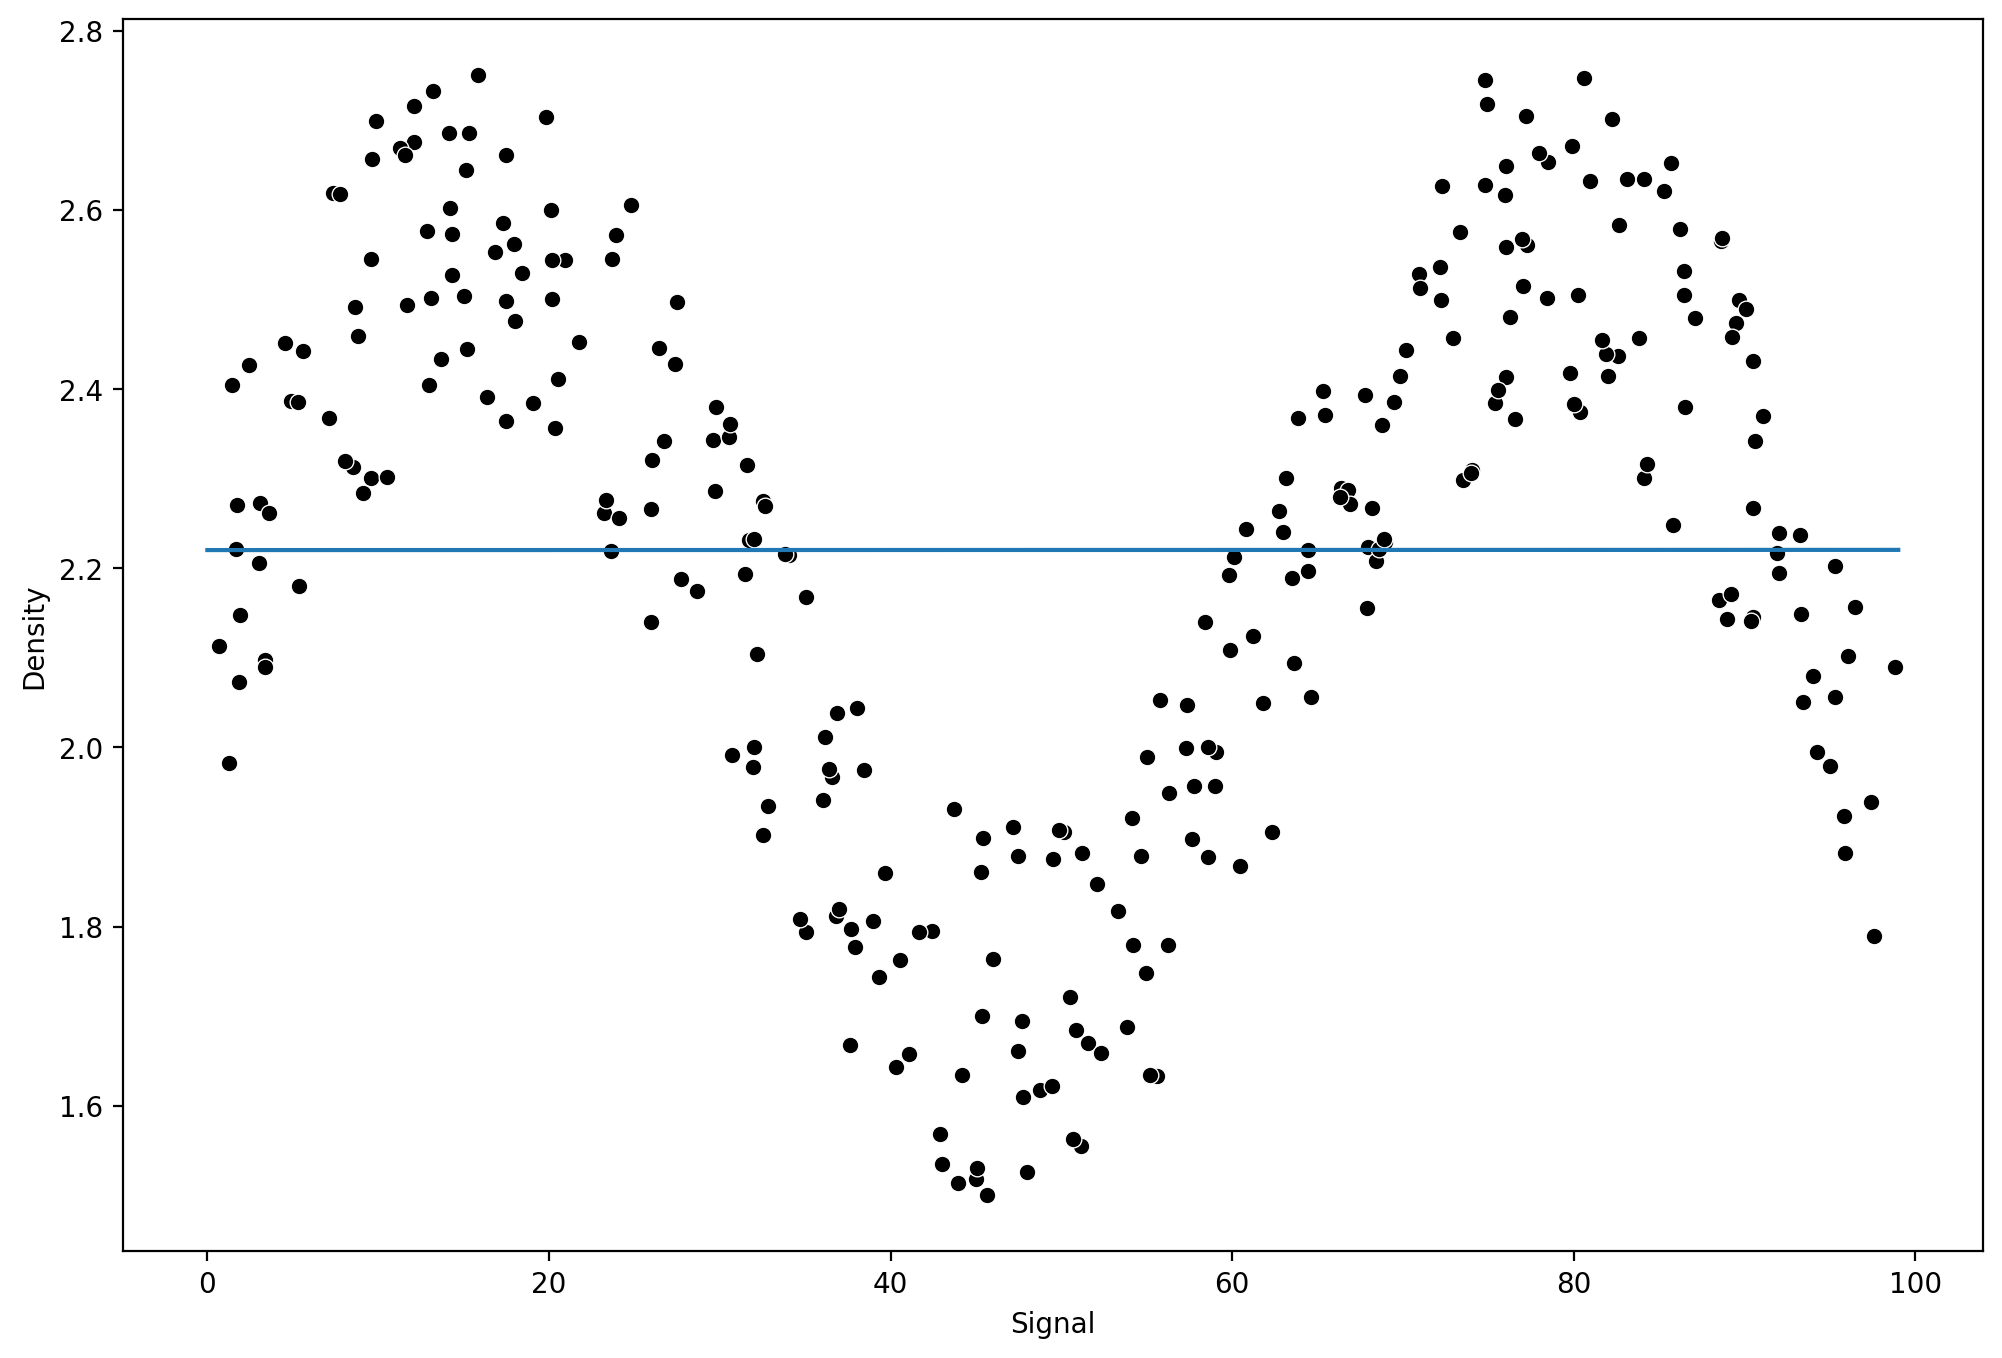

In [21]:
plt.figure(figsize=(12,8),dpi=200)
sns.scatterplot(x='Signal',y='Density',data=df,color='black')
plt.plot(signal_range,lr_output)

# Polynomial Regression

In [22]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [23]:
def run_model(model,X_train,y_train,X_test,y_test):
    
    # Fit Model
    model.fit(X_train,y_train)
    
    # Get Metrics
    
    preds = model.predict(X_test)
    
    rmse = np.sqrt(mean_squared_error(y_test,preds))
    print(f'RMSE : {rmse}')
    
    # Plot results
    signal_range = np.arange(0,100)
    output = model.predict(signal_range.reshape(-1,1))
    
    
    plt.figure(figsize=(12,6),dpi=150)
    sns.scatterplot(x='Signal',y='Density',data=df,color='black')
    plt.plot(signal_range,output)

RMSE : 0.2570051996584629


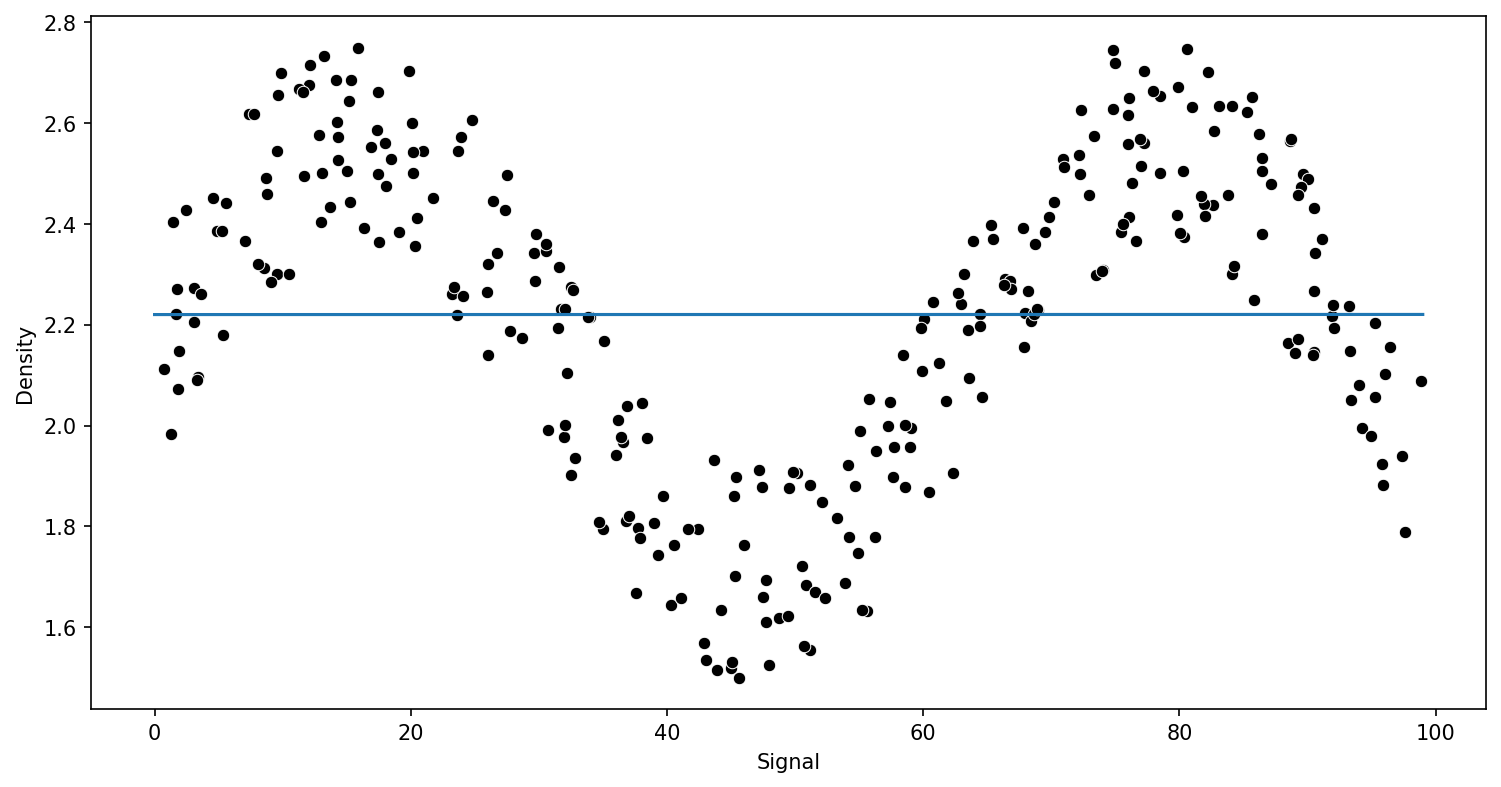

In [24]:
run_model(model,X_train,y_train,X_test,y_test)

# Poly Orders

RMSE : 0.2817309563725596


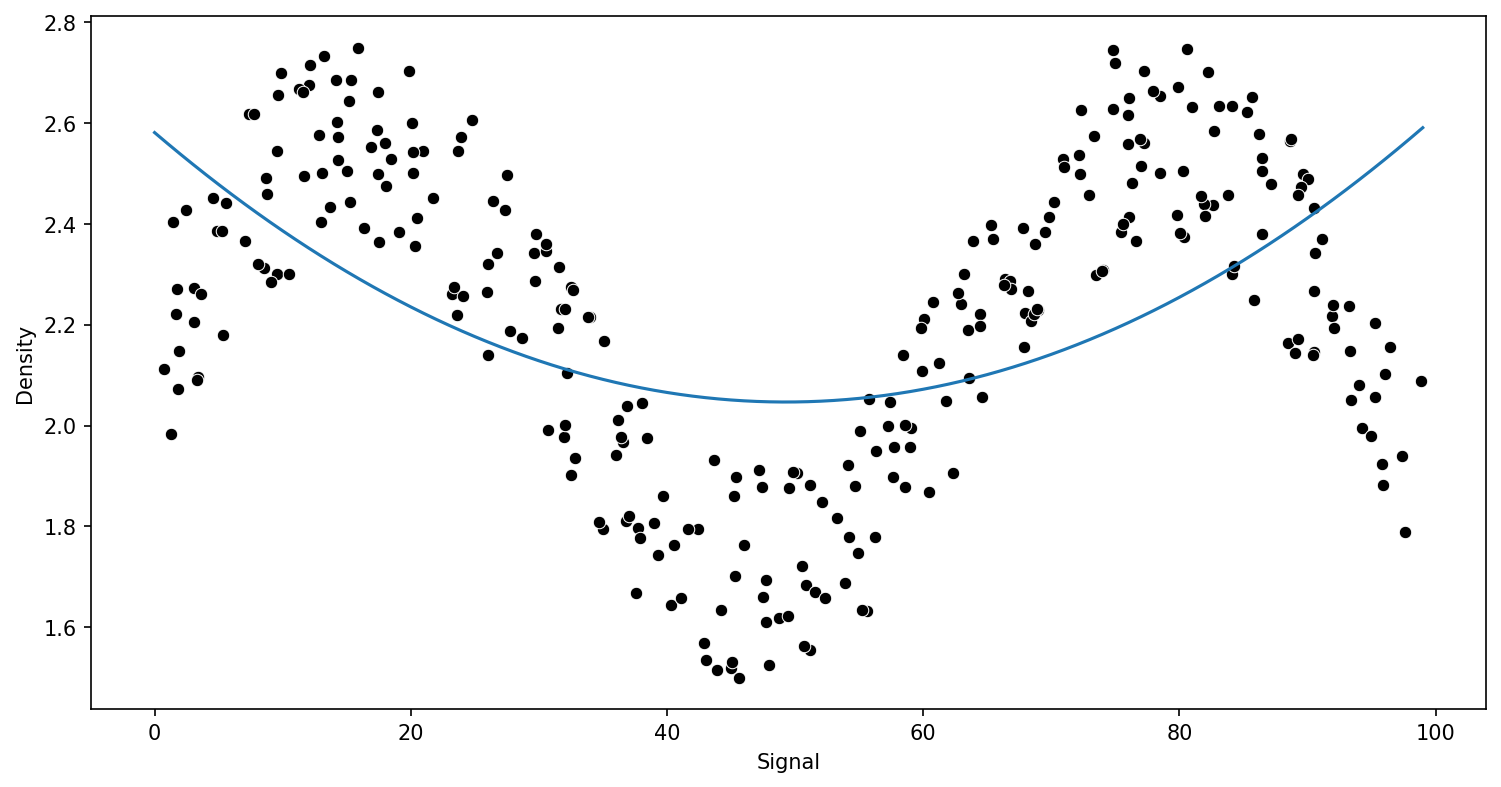

In [25]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

pipe = make_pipeline(PolynomialFeatures(2),LinearRegression())
run_model(pipe,X_train,y_train,X_test,y_test)

RMSE : 0.14078766602101847


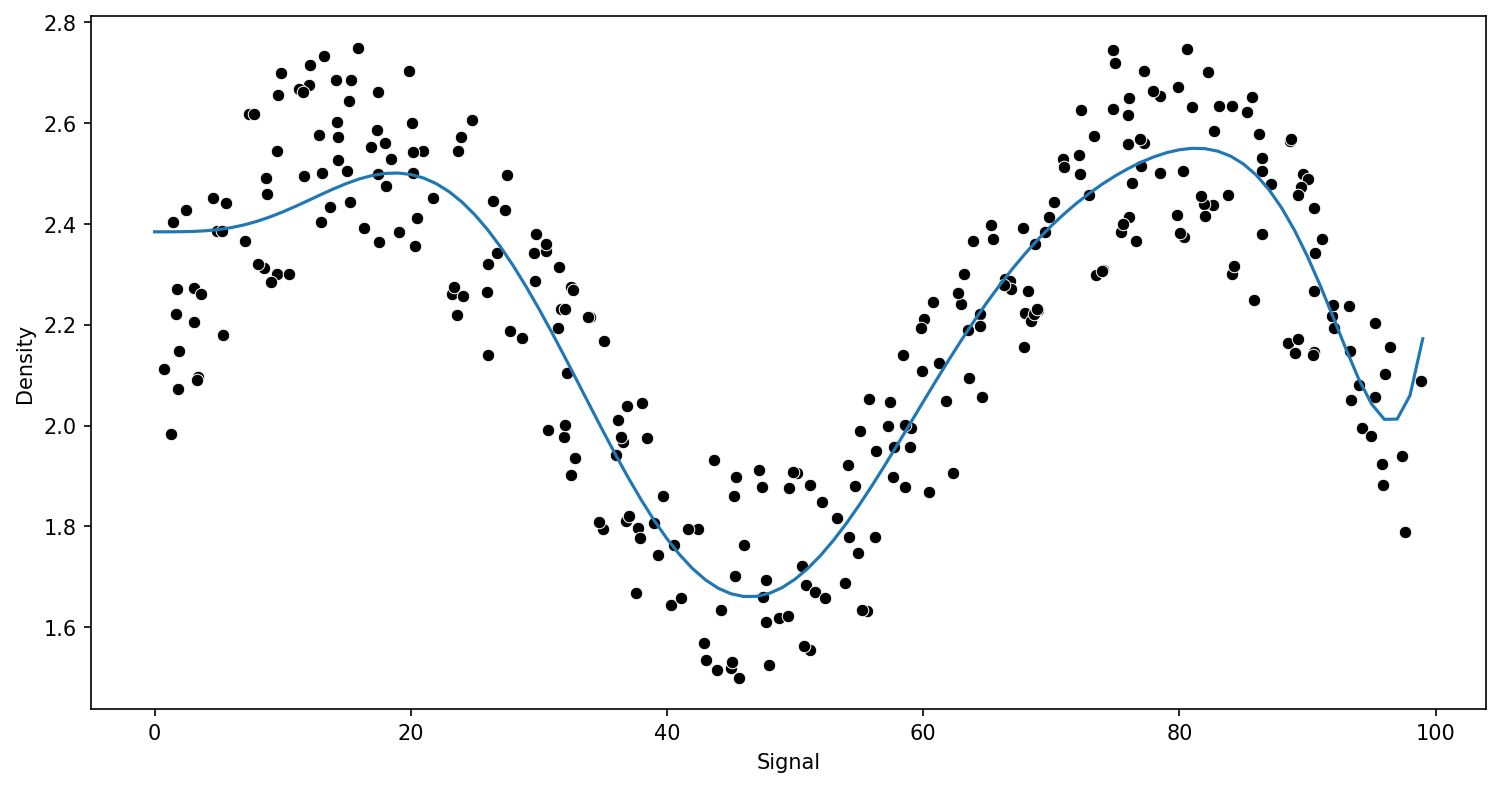

In [26]:
pipe = make_pipeline(PolynomialFeatures(10),LinearRegression())
run_model(pipe,X_train,y_train,X_test,y_test)

# KNN Regression

RMSE : 0.1523487028635337
RMSE : 0.13730685016923647
RMSE : 0.13277855732740926


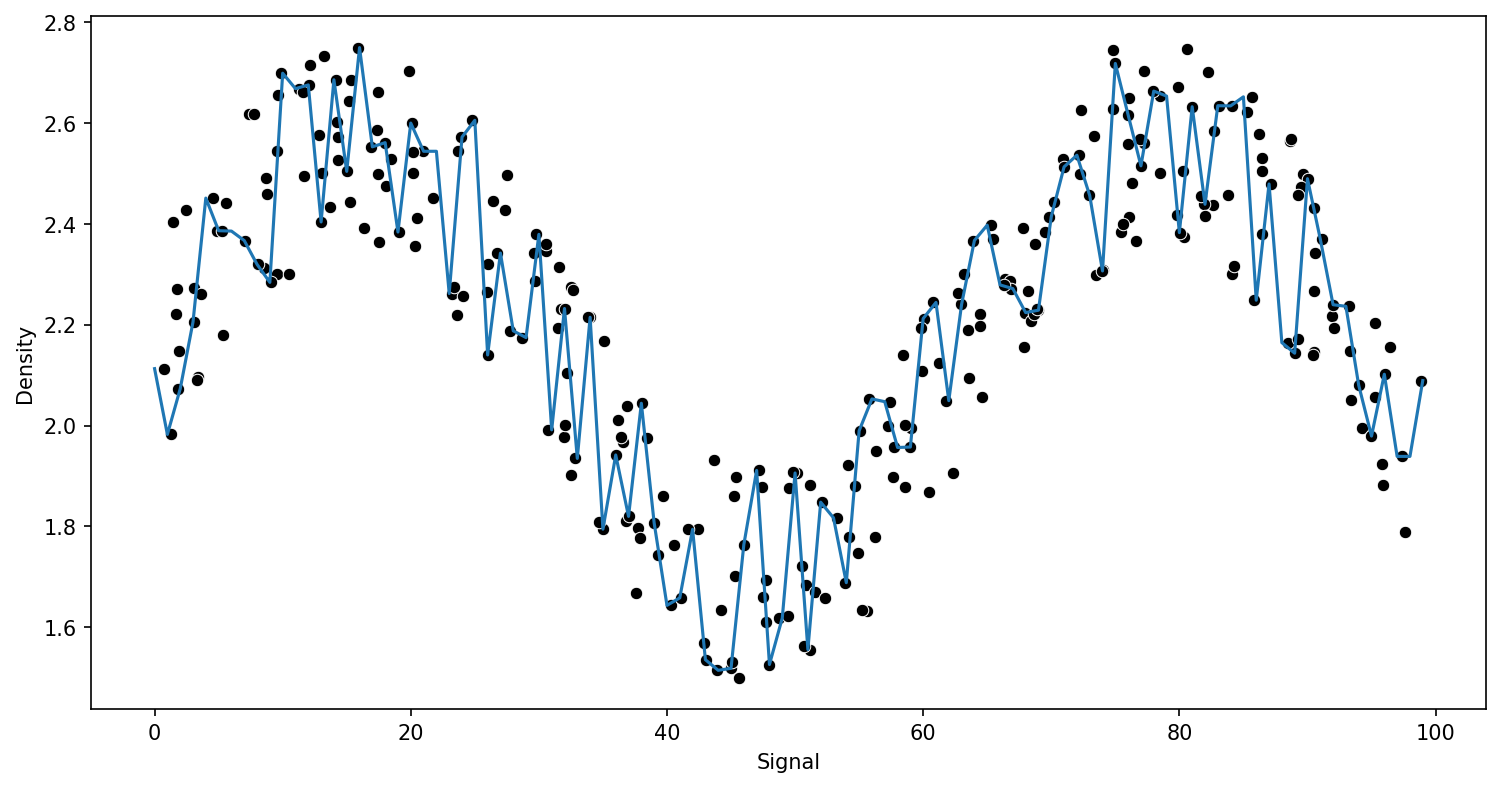

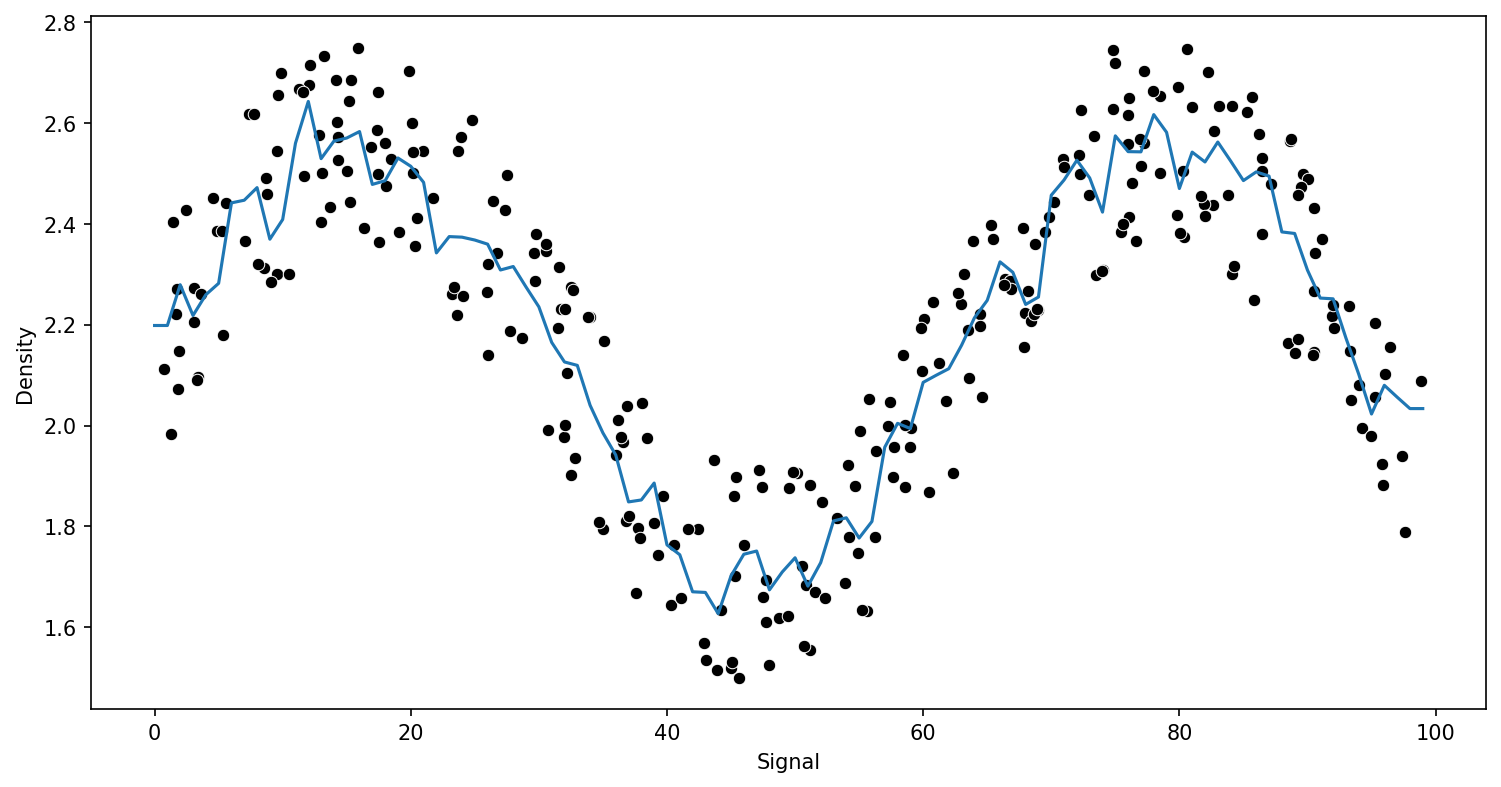

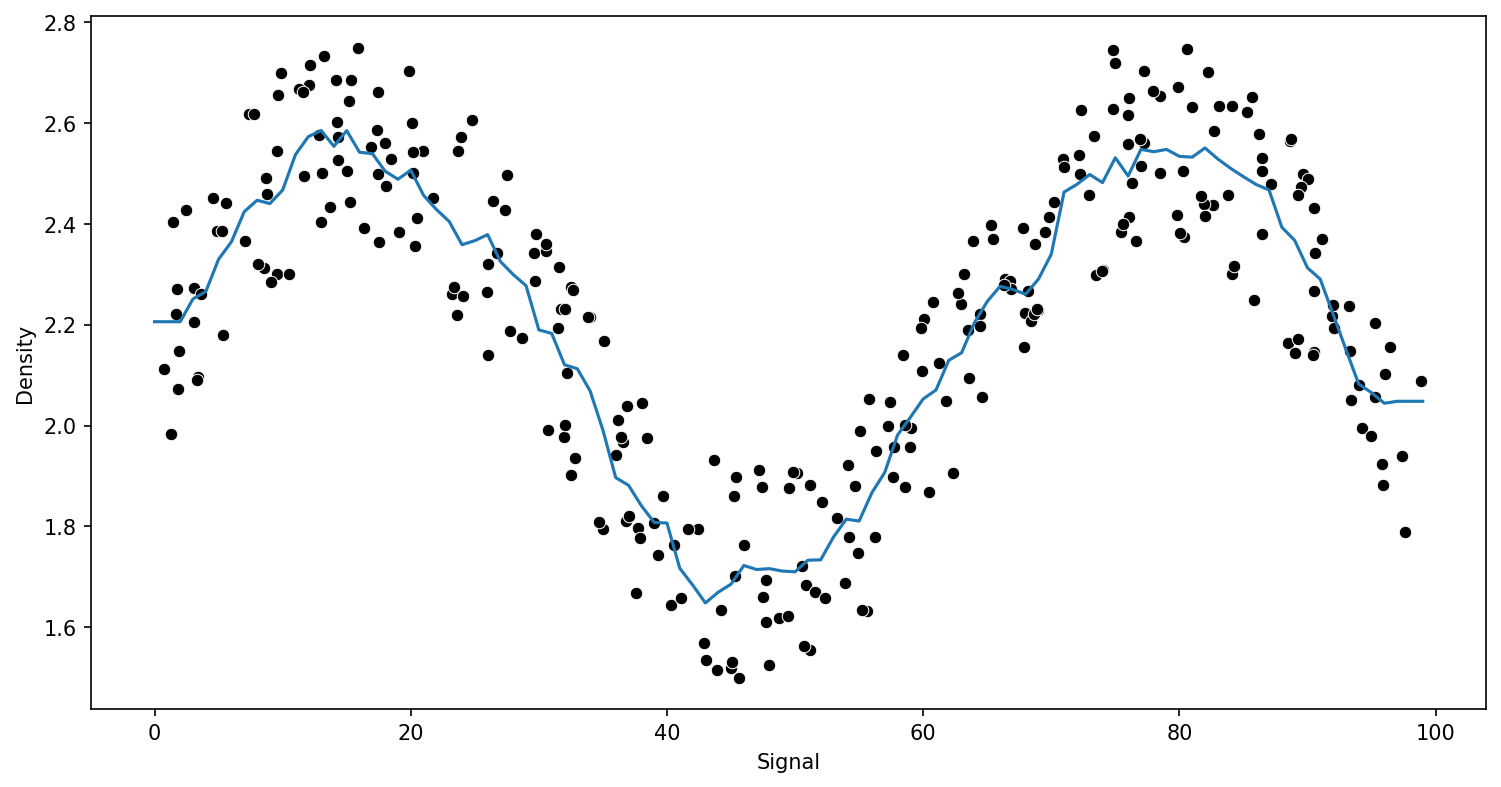

In [27]:
from sklearn.neighbors import KNeighborsRegressor

preds = {}
k_values = [1,5,10]
for n in k_values:
    
    
    model = KNeighborsRegressor(n_neighbors=n)
    run_model(model,X_train,y_train,X_test,y_test)

# Decision Tree Regression

RMSE : 0.1523487028635337


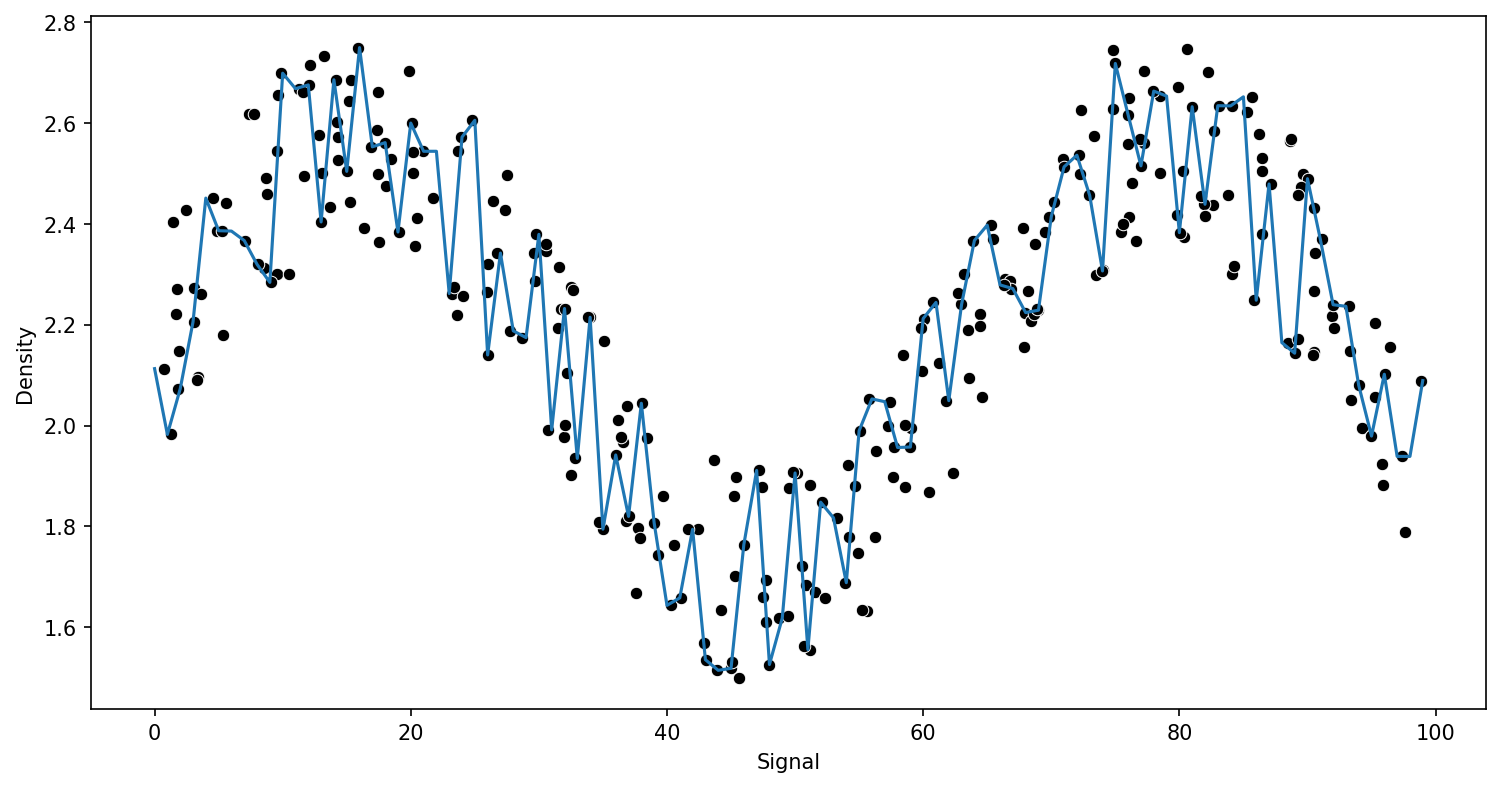

In [28]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()

run_model(model,X_train,y_train,X_test,y_test)

In [29]:
model.get_n_leaves()

270

# Support Vector Regression

In [30]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

param_grid = {'C':[0.01,0.1,1,5,10,100,1000],'gamma':['auto','scale']}
svr = SVR()

RMSE : 0.12646999302047557


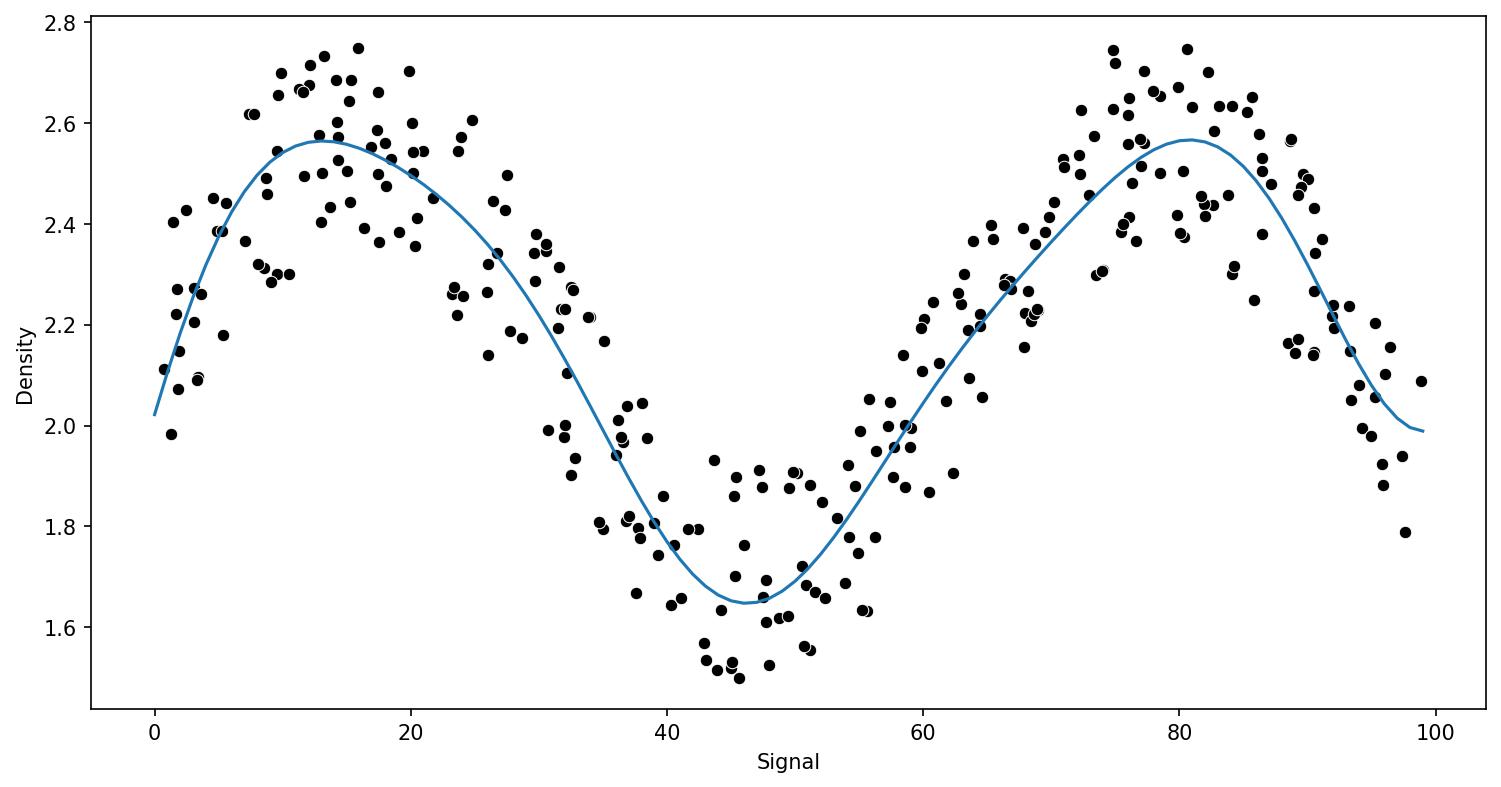

In [31]:
grid = GridSearchCV(svr,param_grid)
run_model(grid,X_train,y_train,X_test,y_test)

In [32]:
grid.best_estimator_

SVR(C=1000)

# Random Forest Regression

RMSE : 0.1366110400943035
RMSE : 0.1361463632928132
RMSE : 0.1310734499347808


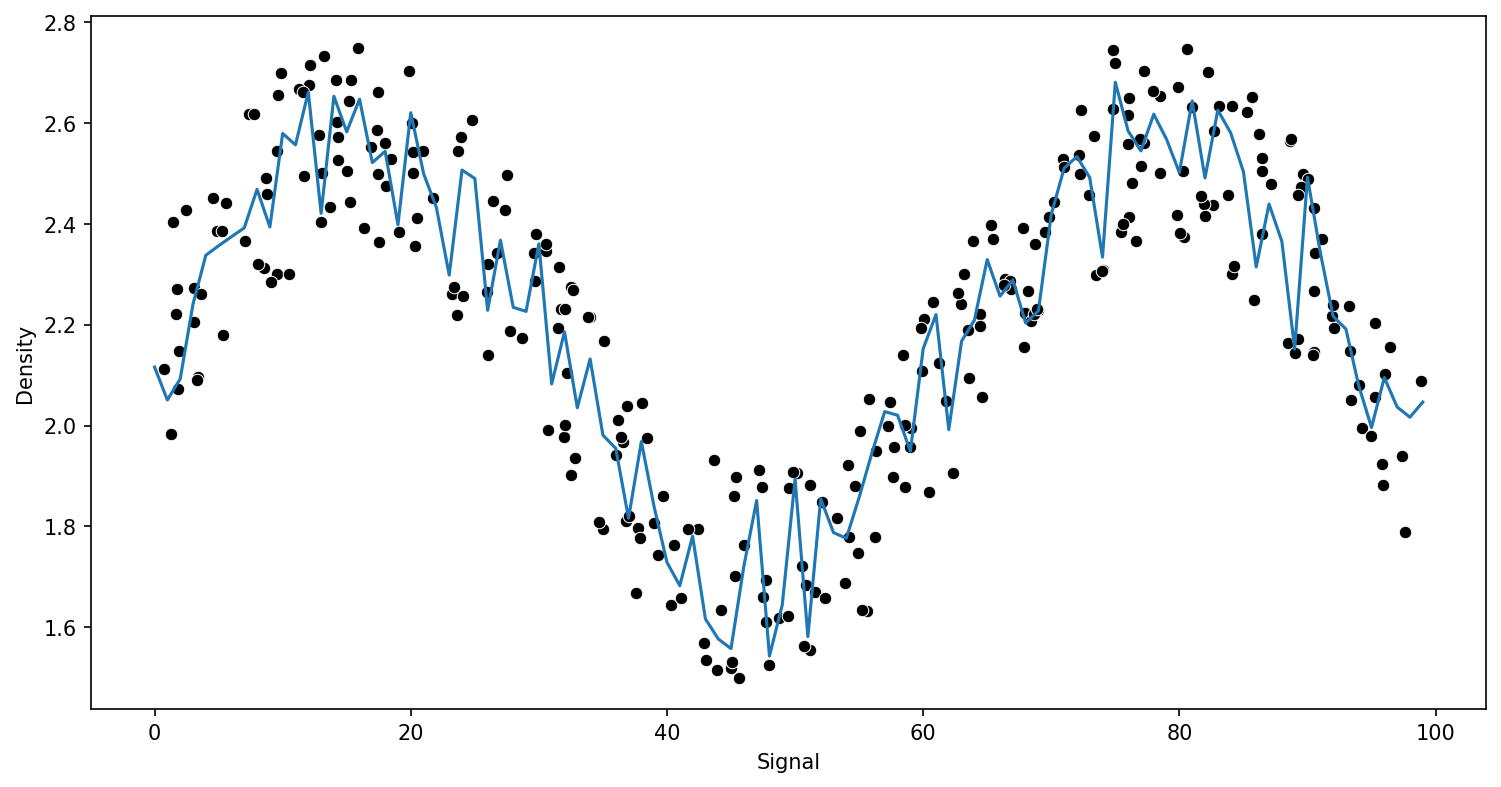

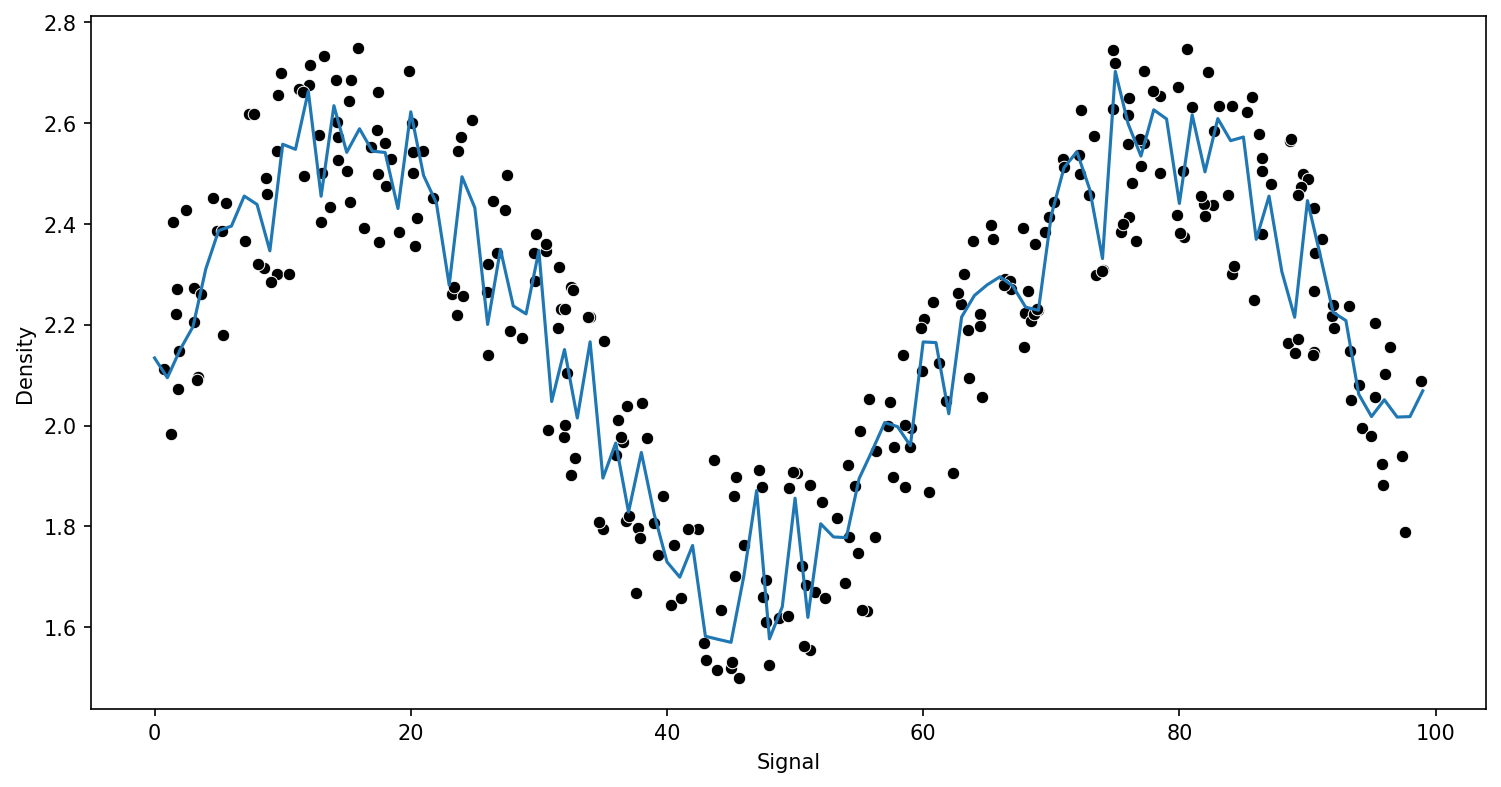

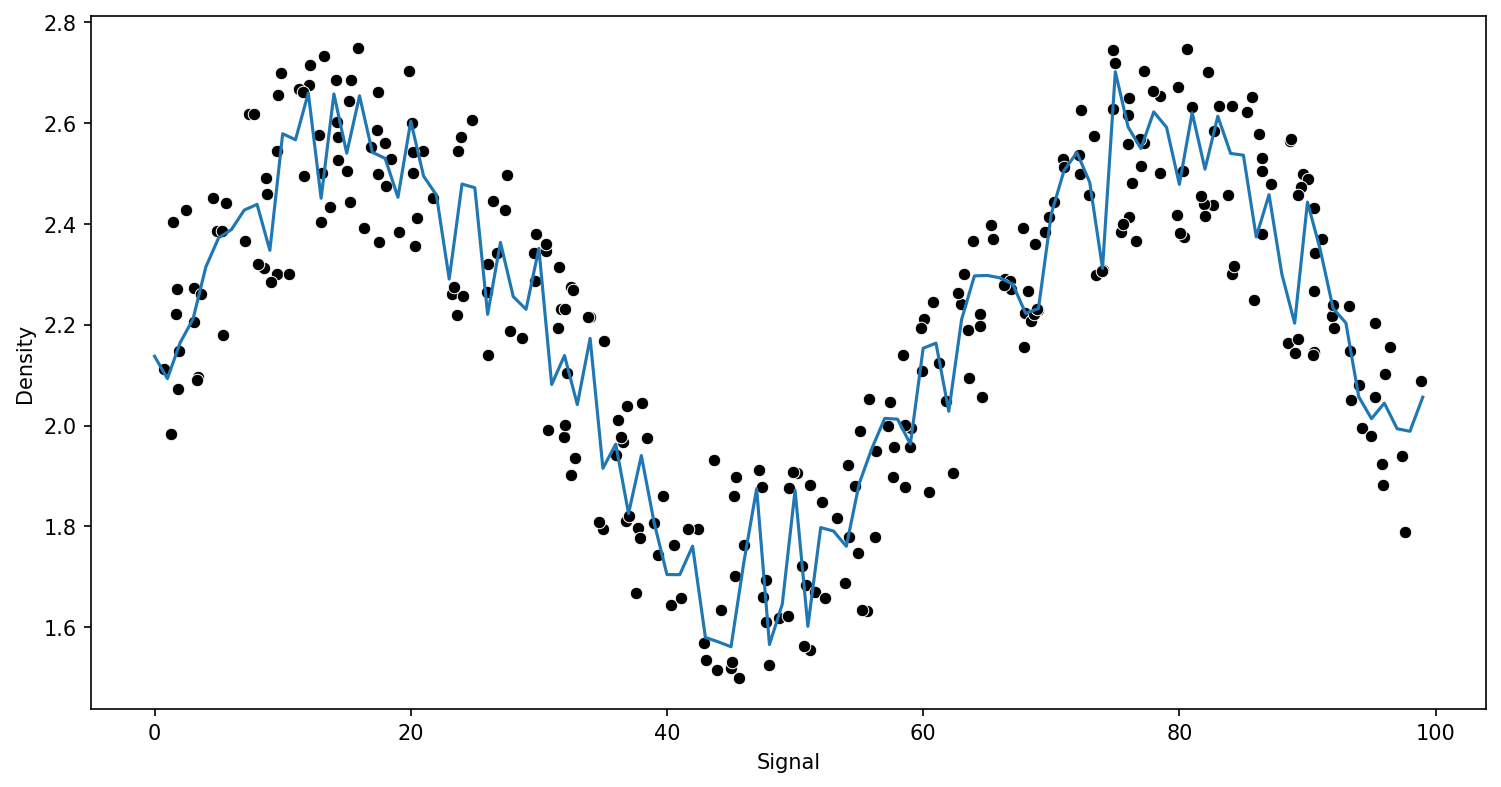

In [33]:
from sklearn.ensemble import RandomForestRegressor
trees = [10,50,100]
for n in trees:
    
    model = RandomForestRegressor(n_estimators=n)
    
    run_model(model,X_train,y_train,X_test,y_test)

# Gradient Boosting

RMSE : 0.13294148649584667


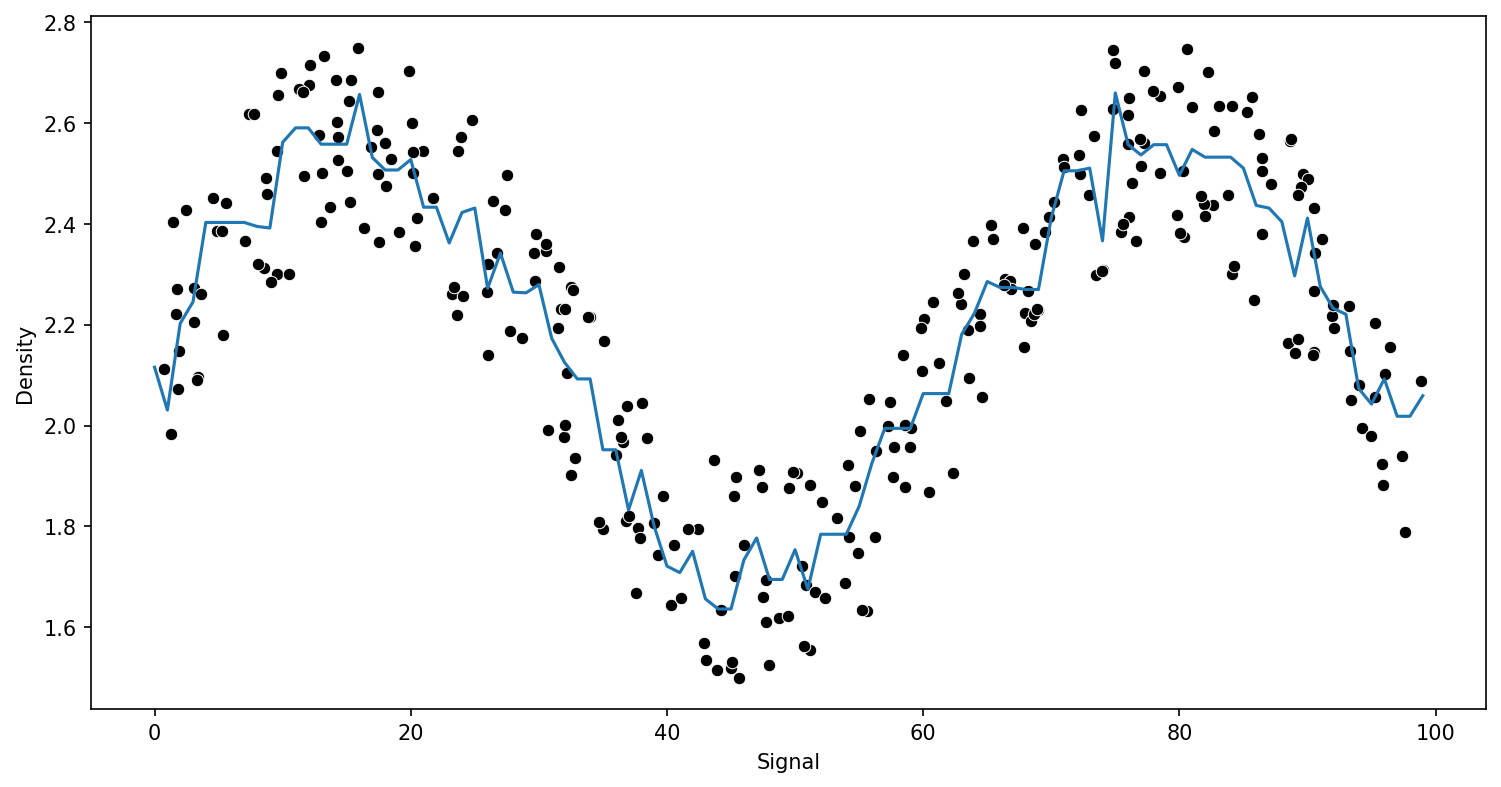

In [34]:
from sklearn.ensemble import GradientBoostingRegressor
   
model = GradientBoostingRegressor()

run_model(model,X_train,y_train,X_test,y_test)

# Adaboost

RMSE : 0.13416556613400057


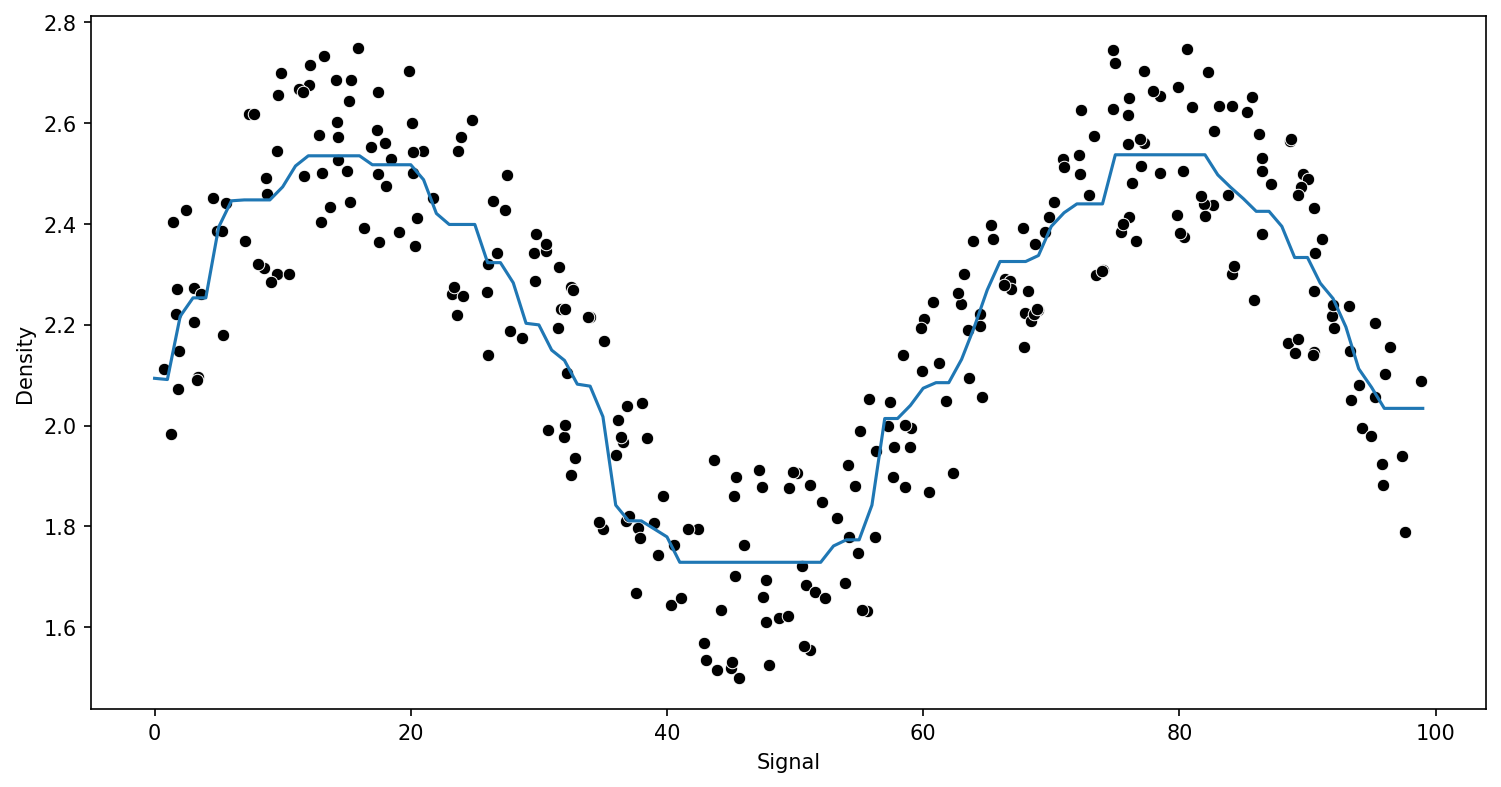

In [35]:
from sklearn.ensemble import AdaBoostRegressor

model = AdaBoostRegressor()

run_model(model,X_train,y_train,X_test,y_test)